In [ ]:
# this also one type of EDA 
# age         salary    weight    distance 
# 30          45k        55kg        20km 
# each and every features having different units 
# while appling ML......>
# (12576)^2     (5)^2
# calculate distance 
# sometimes you need to scale the features value so that all features will come under one scale 
# there is no effects of units kg,km 

In [ ]:
# converting into one scale 
# scale the features 
      # 1.standardization 
      # 2. normalization 
# 100000.....>1......>10......>0.5
# quantity less 
# but the actual value is same
# 1500 for 51k
# 50 for 51
# ask by what refernce values 

In [ ]:
# 1.-> Normalization 
# scale down the feature values between 0 or 1 
# min value =0 
# max value =1 

# 2.-> Standardization 
# standard normal 
# after you applying standa 
# if you calculate mean=0 and std=1 


# normalization 

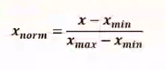

# standardization 

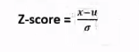

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 

In [8]:
df=sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [11]:
df.shape

(244, 8)

In [5]:
# step:-1 calculate the max value 
# step:-2 calculate the min value 
# step:3 apply the formula 

In [9]:
xmax=df["total_bill"].max()
xmin=df["total_bill"].min()
print("maximum value is ",xmax)
print("minimum value is ",xmin)

maximum value is  50.81
minimum value is  3.07


In [10]:
df["total_bill_norm"]=(df["total_bill"]-xmin)/(xmax-xmin)
df.head()

,total_bill,tip,sex,smoker,day,time,size,total_bill_norm
0,16.99,1.01,Female,No,Sun,Dinner,2,0.291579
1,10.34,1.66,Male,No,Sun,Dinner,3,0.152283
2,21.01,3.50,Male,No,Sun,Dinner,3,0.375786
3,23.68,3.31,Male,No,Sun,Dinner,2,0.431713
4,24.59,3.61,Female,No,Sun,Dinner,4,0.450775


In [13]:
df[["total_bill"]].idxmax() # find the index of maximum values excluding null 

total_bill    170
dtype: int64

In [14]:
df[["total_bill_norm"]].idxmax()
# both are same 

total_bill_norm    170
dtype: int64

In [16]:
df.iloc[[170]]

,total_bill,tip,sex,smoker,day,time,size,total_bill_norm
170,50.81,10.0,Male,Yes,Sat,Dinner,3,1.0


In [17]:
df[["total_bill"]].idxmin() # index of minimum value 

total_bill    67
dtype: int64

In [18]:
df[["total_bill_norm"]].idxmin()

total_bill_norm    67
dtype: int64

In [19]:
df.iloc[[67]]

,total_bill,tip,sex,smoker,day,time,size,total_bill_norm
67,3.07,1.0,Female,Yes,Sat,Dinner,1,0.0


In [20]:
df.iloc[[67,170]]

,total_bill,tip,sex,smoker,day,time,size,total_bill_norm
67,3.07,1.0,Female,Yes,Sat,Dinner,1,0.0
170,50.81,10.0,Male,Yes,Sat,Dinner,3,1.0


## standardization

In [21]:
xmean=df["total_bill"].mean()
xstd=df["total_bill"].std()
print("mean is ",xmean)
print("std is ",xstd)

mean is  19.785942622950824
std is  8.902411954856856


In [22]:
# now apply the formula 

In [23]:
df["total_bill_std"]=(df["total_bill"]-xmean)/xstd

In [24]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,total_bill_norm,total_bill_std
0,16.99,1.01,Female,No,Sun,Dinner,2,0.291579,-0.314066
1,10.34,1.66,Male,No,Sun,Dinner,3,0.152283,-1.061054
2,21.01,3.50,Male,No,Sun,Dinner,3,0.375786,0.137497
3,23.68,3.31,Male,No,Sun,Dinner,2,0.431713,0.437416
4,24.59,3.61,Female,No,Sun,Dinner,4,0.450775,0.539635


In [27]:
print(df["total_bill_std"].mean())
print(df["total_bill_std"].std())

-4.88793886968678e-16
1.0


# using packages 

In [37]:
df=sns.load_dataset("tips")

In [38]:
from sklearn.preprocessing import MinMaxScaler  # step-1

In [40]:
mms=MinMaxScaler() # step-2 
mms

MinMaxScaler()

In [41]:
df["total_bill_normal"]=mms.fit_transform(df["total_bill"]) # step-3 

ValueError: Expected 2D array, got 1D array instead:
array=[16.99 10.34 21.01 23.68 24.59 25.29  8.77 26.88 15.04 14.78 10.27 35.26
 15.42 18.43 14.83 21.58 10.33 16.29 16.97 20.65 17.92 20.29 15.77 39.42
 19.82 17.81 13.37 12.69 21.7  19.65  9.55 18.35 15.06 20.69 17.78 24.06
 16.31 16.93 18.69 31.27 16.04 17.46 13.94  9.68 30.4  18.29 22.23 32.4
 28.55 18.04 12.54 10.29 34.81  9.94 25.56 19.49 38.01 26.41 11.24 48.27
 20.29 13.81 11.02 18.29 17.59 20.08 16.45  3.07 20.23 15.01 12.02 17.07
 26.86 25.28 14.73 10.51 17.92 27.2  22.76 17.29 19.44 16.66 10.07 32.68
 15.98 34.83 13.03 18.28 24.71 21.16 28.97 22.49  5.75 16.32 22.75 40.17
 27.28 12.03 21.01 12.46 11.35 15.38 44.3  22.42 20.92 15.36 20.49 25.21
 18.24 14.31 14.    7.25 38.07 23.95 25.71 17.31 29.93 10.65 12.43 24.08
 11.69 13.42 14.26 15.95 12.48 29.8   8.52 14.52 11.38 22.82 19.08 20.27
 11.17 12.26 18.26  8.51 10.33 14.15 16.   13.16 17.47 34.3  41.19 27.05
 16.43  8.35 18.64 11.87  9.78  7.51 14.07 13.13 17.26 24.55 19.77 29.85
 48.17 25.   13.39 16.49 21.5  12.66 16.21 13.81 17.51 24.52 20.76 31.71
 10.59 10.63 50.81 15.81  7.25 31.85 16.82 32.9  17.89 14.48  9.6  34.63
 34.65 23.33 45.35 23.17 40.55 20.69 20.9  30.46 18.15 23.1  15.69 19.81
 28.44 15.48 16.58  7.56 10.34 43.11 13.   13.51 18.71 12.74 13.   16.4
 20.53 16.47 26.59 38.73 24.27 12.76 30.06 25.89 48.33 13.27 28.17 12.9
 28.15 11.59  7.74 30.14 12.16 13.42  8.58 15.98 13.42 16.27 10.09 20.45
 13.28 22.12 24.01 15.69 11.61 10.77 15.53 10.07 12.6  32.83 35.83 29.03
 27.18 22.67 17.82 18.78].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [42]:
df["total_bill_normal"]=mms.fit_transform(df[["total_bill"]])

In [43]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,total_bill_normal
0,16.99,1.01,Female,No,Sun,Dinner,2,0.291579
1,10.34,1.66,Male,No,Sun,Dinner,3,0.152283
2,21.01,3.50,Male,No,Sun,Dinner,3,0.375786
3,23.68,3.31,Male,No,Sun,Dinner,2,0.431713
4,24.59,3.61,Female,No,Sun,Dinner,4,0.450775


In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
df=sns.load_dataset("tips")
ss=StandardScaler()
df["total_bill_standard"]=ss.fit_transform(df[["total_bill"]])

In [46]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,total_bill_standard
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314711
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.063235
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137780
3,23.68,3.31,Male,No,Sun,Dinner,2,0.438315
4,24.59,3.61,Female,No,Sun,Dinner,4,0.540745
